[ 1.13142420e+03 -7.14746819e-01] [[ 3.31174519e+01 -7.60883662e-03]
 [-7.60883662e-03  4.07838800e-06]]


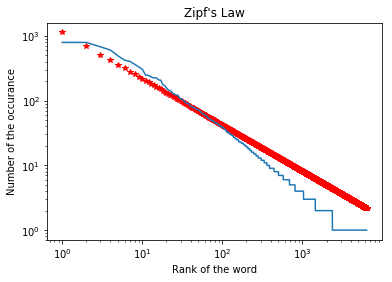

In [2]:
import matplotlib.pyplot as plt
import numpy as np
fp = open('Alice.txt','r',encoding='UTF-8')
dict = {}
line = fp.readline()

while line:
    line = fp.readline()
    splt = line.split()
    for word in splt:
        if word not in dict:
            dict[word] = 1
        else:
            dict[word] += 1
    
fp = fp.close()

num = []
for key in dict:
    num.append(dict[key])
num.sort()
num.reverse()

from scipy import optimize

def test_func(x, amp, alpha):
    return amp*x**alpha
params, params_covariance = optimize.curve_fit(test_func, range(1,len(num)), num[1:])
print(params, params_covariance)
plt.loglog(range(1,len(num)), test_func(range(1,len(num)), params[0], params[1]), "r*",label='Fitted funtion')
plt.loglog(range(1,len(num)),num[1:])
plt.title('Zipf\'s Law')
plt.xlabel('Rank of the word')
plt.ylabel('Number of the occurance')
plt.show()